# Berstein Vazirani

Con este algoritmo puedo encontrar el numero secreto en el primer intento, sin importar el largo del número. El algortimo encuentra si cada dígito tiene un 1 o un 0, y realiza un Flip sobre este valor. Permite demostrar la velocidad de cómputo frente al cómputo tradicional en el momento de comparar tareas como la de encontrar un caracter por fuerza bruta.

In [19]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [20]:
secret_number ="1000101"

In [21]:
# Tendremos que usar un qubit auxiliar que nos permita realizar la operación. Es decir 8 qubits y 7 clásicos
qubits  = [x for x in range(0,7)]
circuit = QuantumCircuit(8,7)

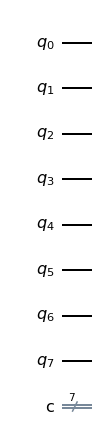

In [22]:
circuit.draw(output='mpl')

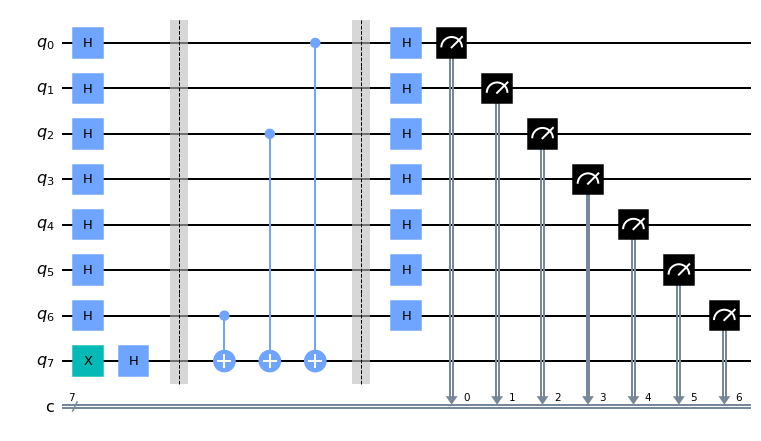

In [23]:
# 7 hadamards por 7 digitos del número a descubrir
circuit.h(qubits)

# El momento en que hace Flip.
circuit.x(7)
circuit.h(7)
circuit.barrier()

# Esto representa el digito que tiene el valor de 1. Qubit al cual se le aplica un CNOT hasta el qubit auxiliar.
circuit.cx(6,7)
circuit.cx(2,7)
circuit.cx(0,7)

circuit.barrier()

circuit.h(qubits)
circuit.measure(qubits,qubits)
circuit.draw(output='mpl')

In [24]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
counts

{'1000101': 1}

En esta parte del notebook se busca crear una forma de automatizar este algoritmo.

The number is {'111001': 1}


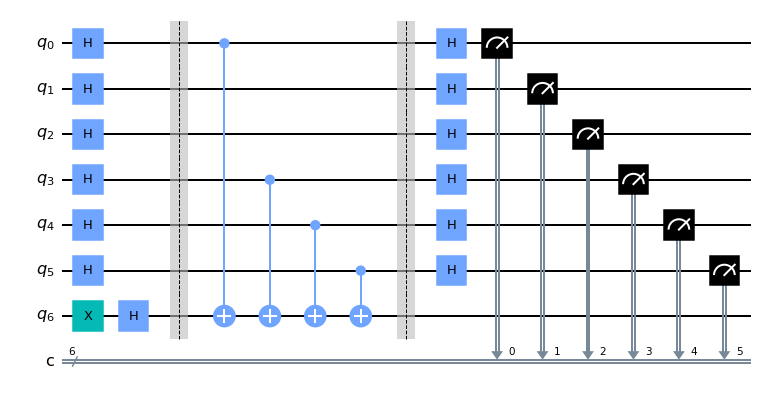

In [25]:
def bernstein(number):
    qubits = [qubit for qubit in range(0,len(number))] # Length dynamic
    
    circuit_qubits = len(qubits) +1 # Qubits + Auxiliar XH qubit
    clasic_bits = circuit_qubits - 1
    circuit = QuantumCircuit(circuit_qubits, clasic_bits)

    # Create first hadamards
    circuit.h(qubits)

    #Aplicamos hadamard como dice el algortimo
    circuit.x(clasic_bits) # No el bit clásico, el número siempre coincide en el rango.
    circuit.h(clasic_bits)
    circuit.barrier()

    # Segunda parte del algoritmo
    digits = [i for i in enumerate(str(number))]
    for index, digit in digits:
        if digit == "1":
            circuit.cx(index,clasic_bits)

    # Realizo las mediciones
    circuit.barrier()
    circuit.h(qubits)
    circuit.measure(qubits,qubits)

    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend=simulator, shots=1).result()
    counts = result.get_counts()
    print("The number is {}".format(counts))

    return circuit.draw(output='mpl')


secret_number = "100111"
bernstein(secret_number)

La compuerta X y la de Hdamard en el qubit auxiliar es crucial para este algoritmo, están  encargados de darle el estado que buscamos para que  me devuelva el número exacto el 100% de las veces, si la compuerta X no estuviera tendríamo 100% de las veces un resultado de 0 digitos. Sin la compuerta de hadamar tendríamos esto:

## Idea Secuenciación ADN

Es posible realizar secuencias o identificación de aminoácidos, cada letra tiene una representación fija en binarios, puedo leerla en binarios e intedificar cual es la que corresponde inmediatamente?

Debido a que las bases nitrogenadas solo son dos que tienen relación bidireccional o intercambiable.

#### Pares Bases nitrogenadas
- A-T
- G-C
- C-G
- T-A
____
#### Representación binaria

- A: 01000001
- T: 01010100
- G: 01000111
- C: 01000011
____
#### FASTA
Los archivos FASTA son un formato de tipo texto que sirve para almacenar secuencias de proteinas, aminoácidos y demás información sobre un sistema molecular.

```text
>U03518 Aspergillus awamori internal transcribed spacer 1 (ITS1)
AACCTGCGGAAGGATCATTACCGAGTGCGGGTCCTTTGGGCCCAACCTCCCATCCGTGTCTATTGTACCC
TGTTGCTTCGGCGGGCCCGCCGCTTGTCGGCCGCCGGGGGGGCGCCTCTGCCCCCCGGGCCCGTGCCCGC
CGGAGACCCCAACACGAACACTGTCTGAAAGCGTGCAGTCTGAGTTGATTGAATGCAATCAGTTAAAACT
TTCAACAATGGATCTCTTGGTTCCGGC

```

Si quisieramos realizar una encontrar la cadena que corresponde, tendríamos que hacer el ejercicio por fuera bruta, es decir, recorrer la cadena y leer cada aminoácido y según ese devolver el par.


#### Correspondencia binaria y Berstein Vazirani

- A-T : 01000001 - 01010100
- G-C : 01000111 - 01000011

- Según esto el circuito debería ser de 9 qubits y 8 clásicos. (Para un solo aminoácido)
- ¿El problema a resolver está en encontrar las transformaciones lineales que me devuelvan el par que nos interesa?

The number is {'11100010': 1}


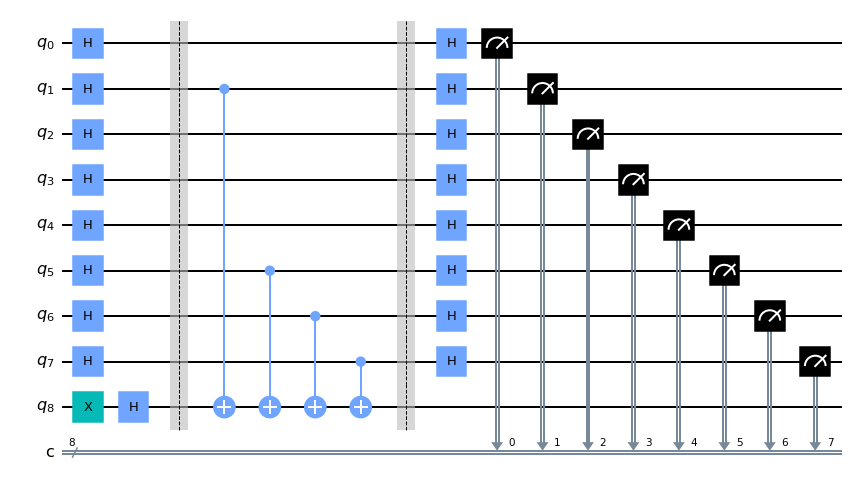

In [26]:
bernstein("01000111") # Guanine
